In [3]:
! ls data/
from scipy.io import wavfile
import scipy.fftpack
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

analiza_USV_szczurow_dla_AI_ifpan_20181221.txt
ch1-2018-11-20_10-42-38_0000021.wav
dlaUJ_VPAmodel_koh3_tickling_20190328.txt
raven.20180405.104543.wav


#  Load annotations #

In [4]:
annotations = pd.read_csv('./data/dlaUJ_VPAmodel_koh3_tickling_20190328.txt', delimiter="\t", index_col='Selection')
annotations.head(20)

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE
Selection,,,,,,,,,,,,
1,Spectrogram 1,1,3.906449,4.897027,0.991,19622.1,27374.0,22460.9,23925.8,ch1-2018-11-20_10-17-43_0000004.wav,7751.9,22-kHz
2,Spectrogram 1,1,4.982955,5.587635,0.605,19622.1,24951.6,21484.4,21972.7,ch1-2018-11-20_10-17-43_0000004.wav,5329.5,22-kHz call
3,Spectrogram 1,1,5.691707,5.926661,0.235,21075.6,24709.3,22949.2,24414.1,ch1-2018-11-20_10-17-43_0000004.wav,3633.7,22-kHz call
4,Spectrogram 1,1,6.178659,6.742458,0.564,19864.3,23740.3,21972.7,23437.5,ch1-2018-11-20_10-17-43_0000004.wav,3876.0,22-kHz call
5,Spectrogram 1,1,7.165841,7.683367,0.518,19864.3,23498.1,21484.4,21972.7,ch1-2018-11-20_10-17-43_0000004.wav,3633.8,22-kHz call
6,Spectrogram 1,1,7.792582,8.454765,0.662,20348.8,24224.8,21972.7,22460.9,ch1-2018-11-20_10-17-43_0000004.wav,3876.0,22-kHz call
7,Spectrogram 1,1,8.661988,9.512852,0.851,19864.3,23982.6,21972.7,21972.7,ch1-2018-11-20_10-17-43_0000004.wav,4118.3,22-kHz call
8,Spectrogram 1,1,9.650617,9.987997,0.337,20106.6,23498.1,21972.7,22460.9,ch1-2018-11-20_10-17-43_0000004.wav,3391.5,22-kHz call
9,Spectrogram 1,1,10.084559,11.013766,0.929,19379.8,24467.1,21972.7,22460.9,ch1-2018-11-20_10-17-43_0000004.wav,5087.3,22-kHz call


## Annotations types `USV TYPE` ##

In [3]:
annotations['USV TYPE'].unique()

array(['22-kHz', '22-kHz call', 'SH', 'FM', 'RP', 'FL', 'ST', 'CMP', 'IU',
       'TR', 'RM'], dtype=object)

In [4]:
counts = annotations.groupby('USV TYPE').count()['View']
counts

USV TYPE
22-kHz           1
22-kHz call     97
CMP            294
FL             379
FM             581
IU              28
RM               2
RP             175
SH             291
ST             458
TR             543
Name: View, dtype: int64

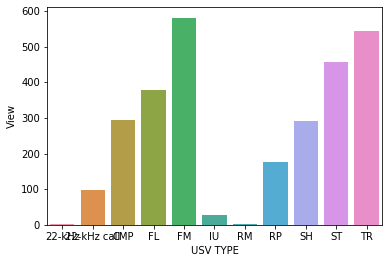

In [5]:
sns.barplot(counts.index, counts)

## Delta Time ##

count    2849.000000
mean        0.075145
std         0.113260
min         0.003000
25%         0.026000
50%         0.046000
75%         0.077000
max         1.317000
Name: Delta Time (s), dtype: float64

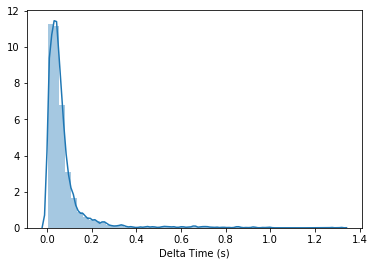

In [6]:
sns.distplot(annotations['Delta Time (s)'])
annotations['Delta Time (s)'].describe()

## Low/High Freq ##

count     2849.000000
mean     43730.375641
std      13197.966715
min      18203.900000
25%      32843.100000
50%      44520.500000
75%      53336.500000
max      95445.700000
Name: Low Freq (Hz), dtype: float64

count      2849.000000
mean      61483.229730
std       15554.806315
min       23058.300000
25%       52475.200000
50%       61088.300000
75%       70714.300000
max      119832.700000
Name: High Freq (Hz), dtype: float64

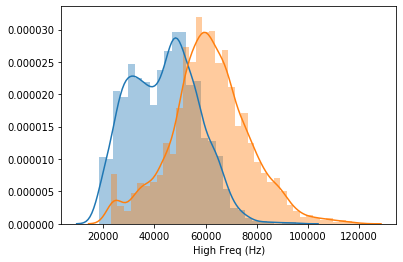

In [7]:
sns.distplot(annotations['Low Freq (Hz)'])
display(annotations['Low Freq (Hz)'].describe())


sns.distplot(annotations['High Freq (Hz)'])
display(annotations['High Freq (Hz)'].describe())


# Analize single data file #

In [8]:
ann = annotations[annotations['Begin File'] == 'ch1-2018-11-20_10-42-38_0000021.wav']
ann

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE
Selection,,,,,,,,,,,,
2721,Spectrogram 1,1,961.626661,961.646652,0.020,56981.5,65451.7,63476.6,63476.6,ch1-2018-11-20_10-42-38_0000021.wav,8470.2,TR
2722,Spectrogram 1,1,962.907771,962.956739,0.049,50308.0,53901.4,52246.1,51757.8,ch1-2018-11-20_10-42-38_0000021.wav,3593.4,FL
2723,Spectrogram 1,1,964.634353,964.665800,0.031,65708.4,76232.0,72265.6,72265.6,ch1-2018-11-20_10-42-38_0000021.wav,10523.6,FM
2724,Spectrogram 1,1,964.766430,964.772271,0.006,57238.2,62885.0,61523.4,61035.2,ch1-2018-11-20_10-42-38_0000021.wav,5646.8,SH
2725,Spectrogram 1,1,965.863053,965.869791,0.007,56211.5,59291.6,58105.5,58105.5,ch1-2018-11-20_10-42-38_0000021.wav,3080.1,SH
...,...,...,...,...,...,...,...,...,...,...,...,...
2845,Spectrogram 1,1,1078.783906,1078.791993,0.008,59291.6,67248.5,65918.0,65918.0,ch1-2018-11-20_10-42-38_0000021.wav,7956.9,RP
2846,Spectrogram 1,1,1079.182703,1079.224033,0.041,53644.8,66221.8,62988.3,62500.0,ch1-2018-11-20_10-42-38_0000021.wav,12577.0,TR
2847,Spectrogram 1,1,1079.494477,1079.547487,0.053,53131.4,69301.8,65429.7,62988.3,ch1-2018-11-20_10-42-38_0000021.wav,16170.4,TR


In [9]:
x = np.linspace(961, 1080, 10000)
y = []
i = 0
# print(ann.iloc[0])
for xv in x:
    value = None
    while i < len(ann):
        if xv > ann.iloc[i]['End Time (s)']:
            i += 1
            continue
        if xv >= ann.iloc[i]['Begin Time (s)']:
            value = ann.iloc[i]['USV TYPE']
        break
    y.append(value)
    
print(x.shape, len(y))


(10000,) 10000


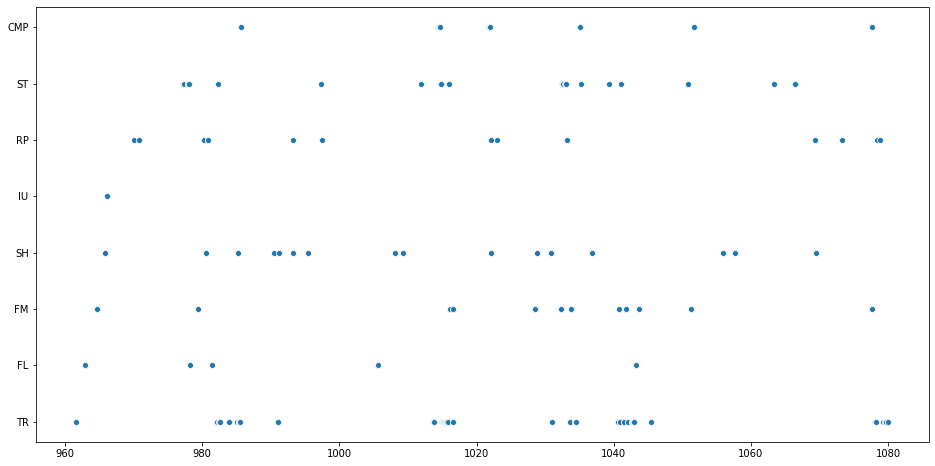

In [10]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x, y)

# Load recording #

In [11]:
fs, data = wavfile.read('./data/ch1-2018-11-20_10-42-38_0000021.wav')
print(fs, data.shape)


250000 (30001224,)


/home/solmyr/Codes/studia/2019-2020-winter/ml2019-20/.env/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [16]:
data

array([  73,   47,  -63, ...,  183,   23, -101], dtype=int16)

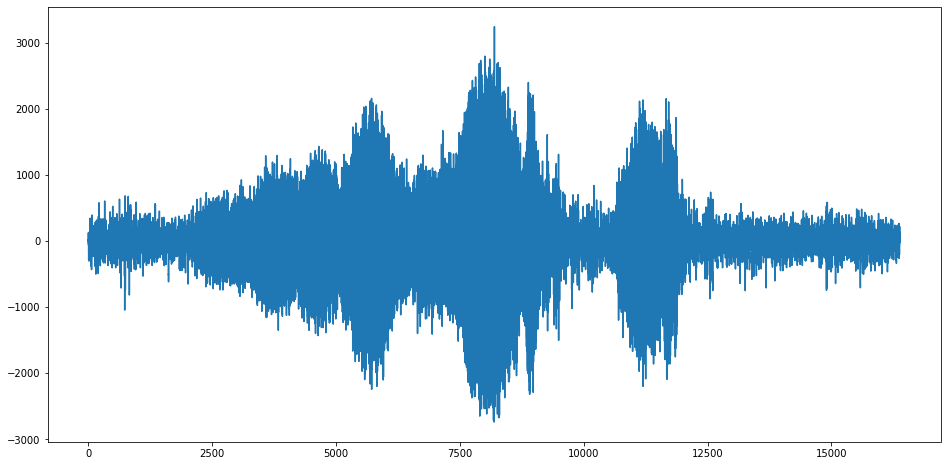

In [32]:
window_size = 2**14

offset = 13810320 #179346
# offset = 1619072

frame = data[offset:offset+window_size]
plt.figure(figsize=(16, 8))
sns.lineplot(np.arange(window_size), frame)


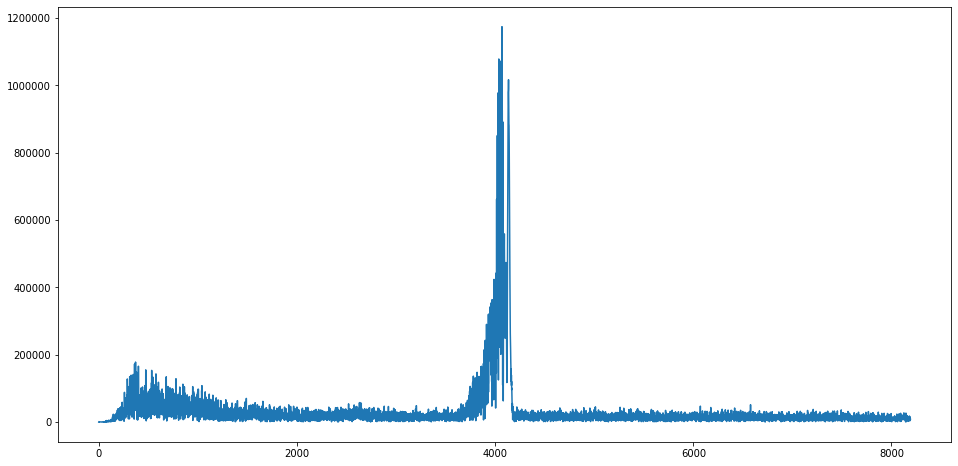

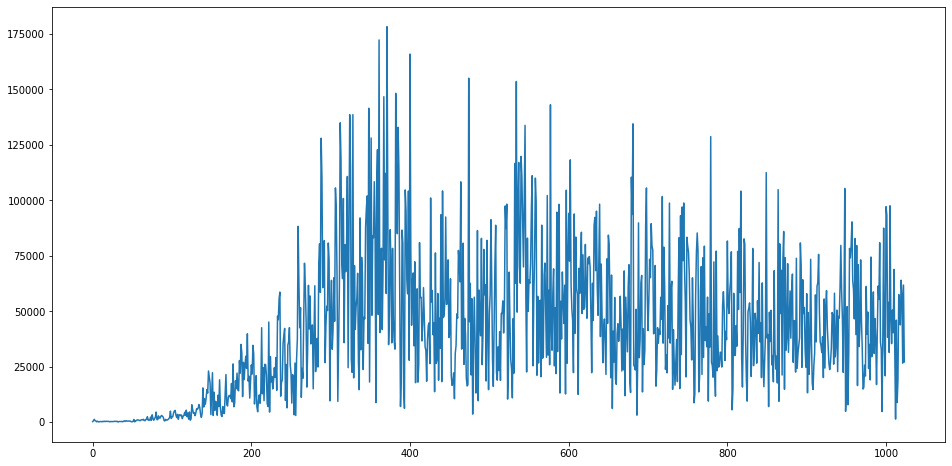

In [36]:
# https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
yf = scipy.fftpack.fft(frame)

# plot whole FFT
plt.figure(figsize=(16, 8))
# plt.yscale('log')
sns.lineplot(np.arange(window_size//2), np.abs(yf[:window_size//2]))

# plot begining of FFT
plt.figure(figsize=(16, 8))
# plt.yscale('log')
sns.lineplot(np.arange(1024), np.abs(yf[:1024]))

# initial_data folder analysis #

In [38]:
annotations = pd.read_csv('./data/analiza_USV_szczurow_dla_AI_ifpan_20181221.txt', delimiter="\t", index_col='Selection')
annotations.head(20)

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Delta Freq (Hz),Peak Freq (Hz),Center Freq (Hz),Avg Power (dB),Begin File,End File,File Offset (s),NOTE
Selection,,,,,,,,,,,,,,,
1,Spectrogram 1,1,12.517,12.522,0.005,65853.7,68514.4,2660.7,67187.5,67187.5,80.5,raven.20180405.104543.wav,raven.20180405.104543.wav,12.517,sh
2,Spectrogram 1,1,12.706,12.737,0.031,1108.6,81596.5,80487.9,5468.7,32031.2,72.7,raven.20180405.104543.wav,raven.20180405.104543.wav,12.706,junk
3,Spectrogram 1,1,12.957,12.972,0.015,62084.3,78048.8,15964.5,69531.2,69531.2,76.5,raven.20180405.104543.wav,raven.20180405.104543.wav,12.957,junk
4,Spectrogram 1,1,13.233,13.242,0.009,57871.4,84922.4,27051.0,66796.9,67578.1,82.8,raven.20180405.104543.wav,raven.20180405.104543.wav,13.233,junk
5,Spectrogram 1,1,13.372,13.454,0.082,47006.7,68514.4,21507.7,61328.1,61718.7,76.1,raven.20180405.104543.wav,raven.20180405.104543.wav,13.372,cmp
6,Spectrogram 1,1,13.693,13.705,0.012,6430.2,53436.8,47006.6,13281.2,18750.0,69.3,raven.20180405.104543.wav,raven.20180405.104543.wav,13.693,junk
7,Spectrogram 1,1,14.237,14.257,0.020,59201.8,69844.8,10643.0,62500.0,62890.6,76.8,raven.20180405.104543.wav,raven.20180405.104543.wav,14.237,fm
8,Spectrogram 1,1,14.271,14.279,0.008,59201.8,64523.3,5321.5,61328.1,61718.7,72.7,raven.20180405.104543.wav,raven.20180405.104543.wav,14.271,junk
9,Spectrogram 1,1,14.510,14.518,0.008,57206.2,62084.3,4878.1,60156.2,60156.2,75.8,raven.20180405.104543.wav,raven.20180405.104543.wav,14.510,sh


In [68]:
# annotations[annotations['Begin File'] == annotations['End File']]
single_file = annotations[annotations['Begin File'] == 'raven.20180405.104543.wav']

In [50]:
import librosa

import matplotlib.pyplot as plt
y, sr = librosa.load('./data/raven.20180405.104543.wav')


In [57]:
# import librosa.display
# # print(dir(librosa))

# D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=16*2048)), ref=np.max)
# plt.figure(figsize=(12, 8))
# # plt.subplot(4, 2, 1)
# librosa.display.specshow(D, y_axis='log', fmax=100000)
# plt.colorbar(format='%+2.0f dB')
# plt.title('Linear-frequency power spectrogram')


'raven.20180405.104543.wav'

200000 (12000000,)
2591400 2594400


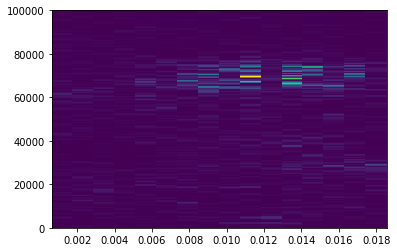

In [89]:
from scipy import signal
fs, data = wavfile.read('./data/raven.20180405.104543.wav')
print(fs, data.shape)
offset = 512
start = int(single_file.iloc[2]['Begin Time (s)']*fs)
end = int(single_file.iloc[2]['End Time (s)']*fs)
print(start, end)
f, t, Sxx = signal.spectrogram(data[(start - offset):(end + offset)], fs, return_onesided=True, nfft=1024)
plt.pcolormesh(t, f, Sxx)